In [8]:
pip install opencv-python


  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install opencv-python-headless


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   --- ------------------------------------ 3.1/38.8 MB 37.0 MB/s eta 0:00:01
   ----- ---------------------------------- 5.2/38.8 MB 12.8 MB/s eta 0:00:03
   --------- ------------------------------ 9.2/38.8 MB 15.9 MB/s eta 0:00:02
   ---------- ----------------------------- 10.2/38.8 MB 12.5 MB/s eta 0:00:03
   ------------ --------------------------- 11.8/38.8 MB 11.7 MB/s eta 0:00:03
   -------------- ------------------------- 14.2/38.8 MB 11.7 MB/s eta 0:00:03
   ----------------- ---------------------- 17.3/38.8 MB 12.1 MB/s eta 0:00:02
   --------------------- ------------------ 20.7/38.8 MB 12.7 MB/s eta 0:00:02
   ------------------------- -------------- 24.9/38.8 MB 13.5 MB/s eta 0:00:02
   --------------------------- ------------ 27.0/38.8 MB 13.3 MB/s eta 0:00:01
   ----------------------------- ---------- 28.8/38.8 MB 12.8 MB/s eta 0:00:01
   ------------------------------- -------- 30.7/38.8 MB 12.6 MB

In [10]:
import cv2
print(cv2.__version__)



4.10.0


In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 1563 files belonging to 9 classes.
['Healthy', 'Infected-Aphids', 'Infected-Army worm', 'Infected-Bacterial Blight', 'Infected-Cotton Boll Rot', 'Infected-Curl Virus', 'Infected-Fussarium Wilt', 'Infected-Powdery mildew', 'Infected-Target Spot']


In [3]:
cnn = tf.keras.models.load_model(r'C:\Users\aksha\Desktop\mli\model\trained_cotton_disease_model.keras')


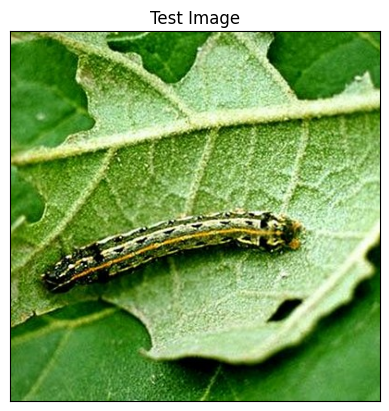

In [11]:
import cv2
import matplotlib.pyplot as plt

image_path = r'C:\Users\aksha\Desktop\mli\train\Infected-Army worm\Army worm0047.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


In [12]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  
predictions = cnn.predict(input_arr)

1/1 [==============================] - 6s 6s/step


In [13]:
print(predictions)

[[2.0270028e-15 9.0198235e-15 1.0000000e+00 2.7932372e-14 1.3380950e-14
  1.1714393e-16 5.3398123e-14 2.8995434e-13 4.1776487e-15]]


In [14]:
result_index = np.argmax(predictions) 
print(result_index)

2


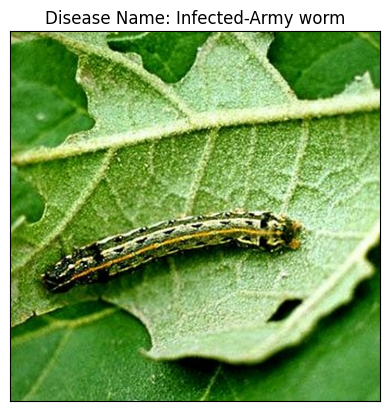

In [15]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
cnn.save('trained_test_disease_model.keras')